<a href="https://colab.research.google.com/github/Vinuboi321/SBALoanApprovalMachineLearning/blob/main/ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import important modules
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.datasets import make_classification
import xgboost as xgb
from xgboost import plot_tree
from statistics import mean, stdev
from sklearn import preprocessing
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
from sklearn import datasets
from matplotlib.patches import Patch
import seaborn as sns

In [ ]:
#Importing the dataset
sba = pd.read_csv('SBAnational.csv')

In [ ]:
#Looking at the data set to analyze
sba

,LoanNr_ChkDgt,Name,City,State,Zip,Bank,BankState,NAICS,ApprovalDate,ApprovalFY,...,RevLineCr,LowDoc,ChgOffDate,DisbursementDate,DisbursementGross,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,1000014003,ABC HOBBYCRAFT,EVANSVILLE,IN,47711,FIFTH THIRD BANK,OH,451120,28-Feb-97,1997,...,N,Y,NaN,28-Feb-99,"$60,000.00",$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,1000024006,LANDMARK BAR & GRILLE (THE),NEW PARIS,IN,46526,1ST SOURCE BANK,IN,722410,28-Feb-97,1997,...,N,Y,NaN,31-May-97,"$40,000.00",$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,1000034009,"WHITLOCK DDS, TODD M.",BLOOMINGTON,IN,47401,GRANT COUNTY STATE BANK,IN,621210,28-Feb-97,1997,...,N,N,NaN,31-Dec-97,"$287,000.00",$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,1000044001,"BIG BUCKS PAWN & JEWELRY, LLC",BROKEN ARROW,OK,74012,1ST NATL BK & TR CO OF BROKEN,OK,0,28-Feb-97,1997,...,N,Y,NaN,30-Jun-97,"$35,000.00",$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,1000054004,"ANASTASIA CONFECTIONS, INC.",ORLANDO,FL,32801,FLORIDA BUS. DEVEL CORP,FL,0,28-Feb-97,1997,...,N,N,NaN,14-May-97,"$229,000.00",$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432379,4187583006,"D & W WIRELINE, INC.",SCOTT,LA,70583,"MIDSOUTH BANK, N.A.",LA,333132,25-Jul-90,1990,...,N,N,NaN,31-Oct-90,"$90,000.00",$0.00,P I F,$0.00,"$90,000.00","$76,500.00"
432380,4187593009,AC TECHNOLOGY CORP,UXBRIDGE,MA,1569,WORCESTER BUS. DEVEL CORP,MA,335314,25-Jul-90,1990,...,N,N,NaN,15-Jan-92,"$114,000.00",$0.00,P I F,$0.00,"$118,000.00","$118,000.00"
432381,4187594005,"GOLDEN GARDENS, INC.",SALISBURY,MD,21804,MANUFACTURERS & TRADERS TR CO,MD,623311,8-Jan-01,2001,...,N,N,NaN,28-Feb-01,"$144,000.00",$0.00,P I F,$0.00,"$144,000.00","$108,000.00"
432382,4187613002,"D & W WIRELINE, INC.",SCOTT,LA,70583,"MIDSOUTH BANK, N.A.",LA,333132,25-Jul-90,1990,...,N,N,NaN,31-Oct-90,"$18,000.00",$0.00,P I F,$0.00,"$18,000.00","$15,300.00"


In [ ]:
# Check the columns
sba.columns

Index(['LoanNr_ChkDgt', 'Name', 'City', 'State', 'Zip', 'Bank', 'BankState',
       'NAICS', 'ApprovalDate', 'ApprovalFY', 'Term', 'NoEmp', 'NewExist',
       'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr',
       'LowDoc', 'ChgOffDate', 'DisbursementDate', 'DisbursementGross',
       'BalanceGross', 'MIS_Status', 'ChgOffPrinGr', 'GrAppv', 'SBA_Appv'],
      dtype='object')

In [ ]:
# Check for any missing values
sba.isna().sum()

,0
LoanNr_ChkDgt,0
Name,12
City,22
State,11
Zip,0
Bank,681
BankState,683
NAICS,0
ApprovalDate,0
ApprovalFY,0


In [ ]:
#Dropping irrelavant columns and other data
#sba = sba.drop(columns=['City', 'State', 'Zip', 'Bank', 'BankState', 'ApprovalDate', 'ApprovalFY', 'Term'])
sba = sba.drop(columns=['LoanNr_ChkDgt', 'City', 'State', 'Bank', 'BankState',
                        'ApprovalDate', 'ChgOffDate', 'ApprovalFY', 'Term', 'DisbursementDate', 'DisbursementGross' ])

#finalized dataframe that will be used
sba

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432379,"D & W WIRELINE, INC.",70583,333132,14,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$90,000.00","$76,500.00"
432380,AC TECHNOLOGY CORP,1569,335314,21,1.0,21,0,1,0,N,N,$0.00,P I F,$0.00,"$118,000.00","$118,000.00"
432381,"GOLDEN GARDENS, INC.",21804,623311,5,2.0,0,0,1,1,N,N,$0.00,P I F,$0.00,"$144,000.00","$108,000.00"
432382,"D & W WIRELINE, INC.",70583,333132,13,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$18,000.00","$15,300.00"


In [ ]:
sba.isna().sum()

,0
Name,12
Zip,0
NAICS,0
NoEmp,0
NewExist,74
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,67


In [ ]:
# removed all empty rows
sba = sba.dropna()
sba.isna().sum()

,0
Name,0
Zip,0
NAICS,0
NoEmp,0
NewExist,0
CreateJob,0
RetainedJob,0
FranchiseCode,0
UrbanRural,0
RevLineCr,0


In [ ]:
# Check for duplicate rows
sba.duplicated().sum()

296

In [ ]:
# Removed all duplicate rows
sba.drop_duplicates()

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432379,"D & W WIRELINE, INC.",70583,333132,14,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$90,000.00","$76,500.00"
432380,AC TECHNOLOGY CORP,1569,335314,21,1.0,21,0,1,0,N,N,$0.00,P I F,$0.00,"$118,000.00","$118,000.00"
432381,"GOLDEN GARDENS, INC.",21804,623311,5,2.0,0,0,1,1,N,N,$0.00,P I F,$0.00,"$144,000.00","$108,000.00"
432382,"D & W WIRELINE, INC.",70583,333132,13,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$18,000.00","$15,300.00"


In [ ]:
# Correlation Matrix
cor_fig, cor_ax = plt.subplots(figsize=(15, 10))
corr_matrix = sba.corr()
cor_ax = sns.heatmap(corr_matrix, annot=True)
plt.xticks(rotation=30, horizontalalignment='right', fontsize=8)
plt.yticks(fontsize=8)

plt.show()

In [ ]:
#Spliting the dataset!
y = sba.MIS_Status
X = sba.drop(['MIS_Status'], axis = 1)
train_X, test_X, train_y, test_y = train_test_split(X,y, test_size = 0.1,random_state = 25)

In [ ]:
#finalized dataframe that we will use
sba

,Name,Zip,NAICS,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,BalanceGross,MIS_Status,ChgOffPrinGr,GrAppv,SBA_Appv
0,ABC HOBBYCRAFT,47711,451120,4,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$60,000.00","$48,000.00"
1,LANDMARK BAR & GRILLE (THE),46526,722410,2,2.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$40,000.00","$32,000.00"
2,"WHITLOCK DDS, TODD M.",47401,621210,7,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$287,000.00","$215,250.00"
3,"BIG BUCKS PAWN & JEWELRY, LLC",74012,0,2,1.0,0,0,1,0,N,Y,$0.00,P I F,$0.00,"$35,000.00","$28,000.00"
4,"ANASTASIA CONFECTIONS, INC.",32801,0,14,1.0,7,7,1,0,N,N,$0.00,P I F,$0.00,"$229,000.00","$229,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
432379,"D & W WIRELINE, INC.",70583,333132,14,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$90,000.00","$76,500.00"
432380,AC TECHNOLOGY CORP,1569,335314,21,1.0,21,0,1,0,N,N,$0.00,P I F,$0.00,"$118,000.00","$118,000.00"
432381,"GOLDEN GARDENS, INC.",21804,623311,5,2.0,0,0,1,1,N,N,$0.00,P I F,$0.00,"$144,000.00","$108,000.00"
432382,"D & W WIRELINE, INC.",70583,333132,13,1.0,0,0,1,0,N,N,$0.00,P I F,$0.00,"$18,000.00","$15,300.00"


In [ ]:
# Create a new column with the industry the NAICS code represents
sba['Industry'] = sba['NAICS'].astype('str').apply(lambda x: x[:2])
# Maps the approprate industry to each record based on the first two digits of the NAICS code
sba['Industry'] = sba['Industry'].map({
    '11': 'Ag/For/Fish/Hunt',
    '21': 'Min/Quar/Oil_Gas_ext',
    '22': 'Utilities',
    '23': 'Construction',
    '31': 'Manufacturing',
    '32': 'Manufacturing',
    '33': 'Manufacturing',
    '42': 'Wholesale_trade',
    '44': 'Retail_trade',
    '45': 'Retail_trade',
    '48': 'Trans/Ware',
    '49': 'Trans/Ware',
    '51': 'Information',
    '52': 'Finance/Insurance',
    '53': 'RE/Rental/Lease',
    '54': 'Prof/Science/Tech',
    '55': 'Mgmt_comp',
    '56': 'Admin_sup/Waste_Mgmt_Rem',
    '61': 'Educational',
    '62': 'Healthcare/Social_assist',
    '71': 'Arts/Entertain/Rec',
    '72': 'Accom/Food_serv',
     '81': 'Other_no_pub',
    '92': 'Public_Admin'
})
# Make Default target field based on MIS_Status where P I F = 0 and CHGOFF = 1 so we can see what features are prevalant in a defaulted loan
sba['Default'] = np.where(sba['MIS_Status'] == 'P I F', 0, 1)
sba['Default'].value_counts()

# Check Default percentage by Industry
sba_ind = sba.groupby(['Industry', 'Default'])['Industry'].count().unstack('Default')
sba_ind['Def_Percent'] = sba_ind[1]/(sba_ind[1] + sba_ind[0])
sba_ind

Default,0,1,Def_Percent
Industry,,,
Accom/Food_serv,21724,9102,0.295270
Admin_sup/Waste_Mgmt_Rem,11357,5459,0.324631
Ag/For/Fish/Hunt,2911,416,0.125038
Arts/Entertain/Rec,4823,1938,0.286644
Construction,24685,11487,0.317566
Educational,2298,1078,0.319313
Finance/Insurance,3342,2038,0.378810
Healthcare/Social_assist,20600,3643,0.150270
Information,3749,1853,0.330775


In [ ]:
# Training the XG Boost model
X, y = make_classification(n_samples=1000, n_features=16)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)
xgb_y_pred = xgb.predict(X_test)


XG Boost Accuracy Score: 0.86
XG Boost Model Score: 1.0
XG Boost Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.96      0.86        46
           1       0.95      0.78      0.86        54

    accuracy                           0.86       100
   macro avg       0.87      0.87      0.86       100
weighted avg       0.88      0.86      0.86       100

XG Boost Confusion Matrix:


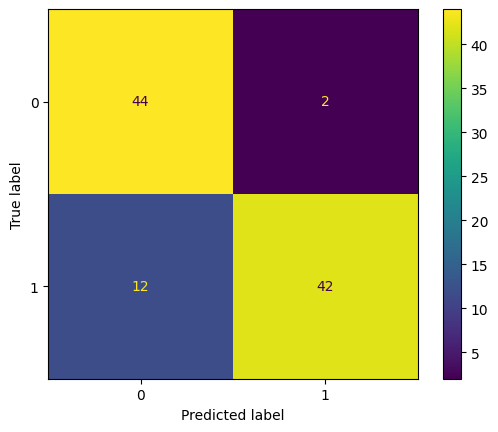

In [ ]:
# Testing accuracy, and model score of XGBoost model
print(f'XG Boost Accuracy Score: {accuracy_score(y_test,xgb_y_pred)}')
print(f'XG Boost Model Score: {xgb.score(X_train, y_train)}')
print(f'XG Boost Classification Report:')
print(classification_report(y_test, xgb_y_pred))
#Forming Confusion Matrix
print(f'XG Boost Confusion Matrix:')
cm = confusion_matrix(y_test, xgb_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
### Cross validation score for XG Boost
xgb_cvs = cross_val_score(xgb, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {xgb_cvs}")
print(f"Average CV Score: {xgb_cvs.mean():.2f}")

In [ ]:
# Define your XGBoost classifier
classifier = xgb.XGBClassifier()  # You can set hyperparameters if needed

# Define the number of folds for stratified cross-validation
n_splits = 5

# Create an instance of StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Train your XGBoost classifier on the entire training set
classifier.fit(X_train, y_train)

# Evaluate your XGBoost classifier on the test set
test_accuracy = classifier.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

Cross-validation scores: [0.94       0.94       0.97333333 0.93333333 0.92      ]
Test set accuracy: 0.92


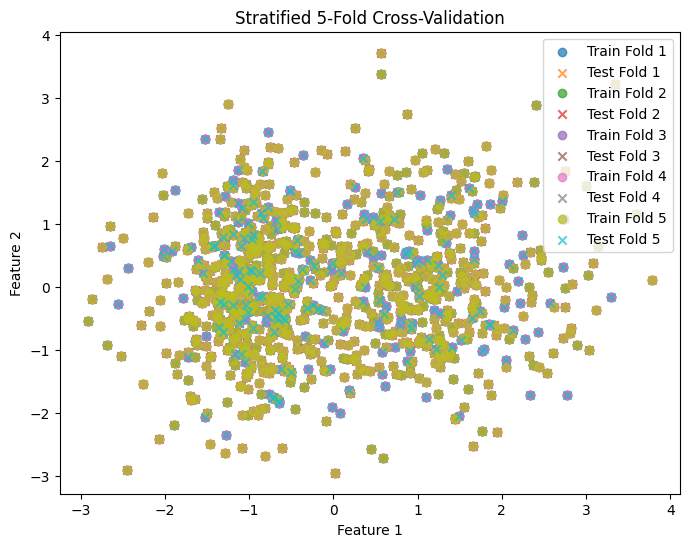

In [ ]:
#Plotting the folds
fig, ax = plt.subplots(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    # Plot training points
    ax.scatter(X[train_index, 0], X[train_index, 1], label=f'Train Fold {i + 1}', alpha=0.7)

    # Plot testing points
    ax.scatter(X[test_index, 0], X[test_index, 1], label=f'Test Fold {i + 1}', marker='x', alpha=0.7)

# Customize plot
ax.set_title(f'Stratified {n_splits}-Fold Cross-Validation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

<Figure size 800x600 with 0 Axes>

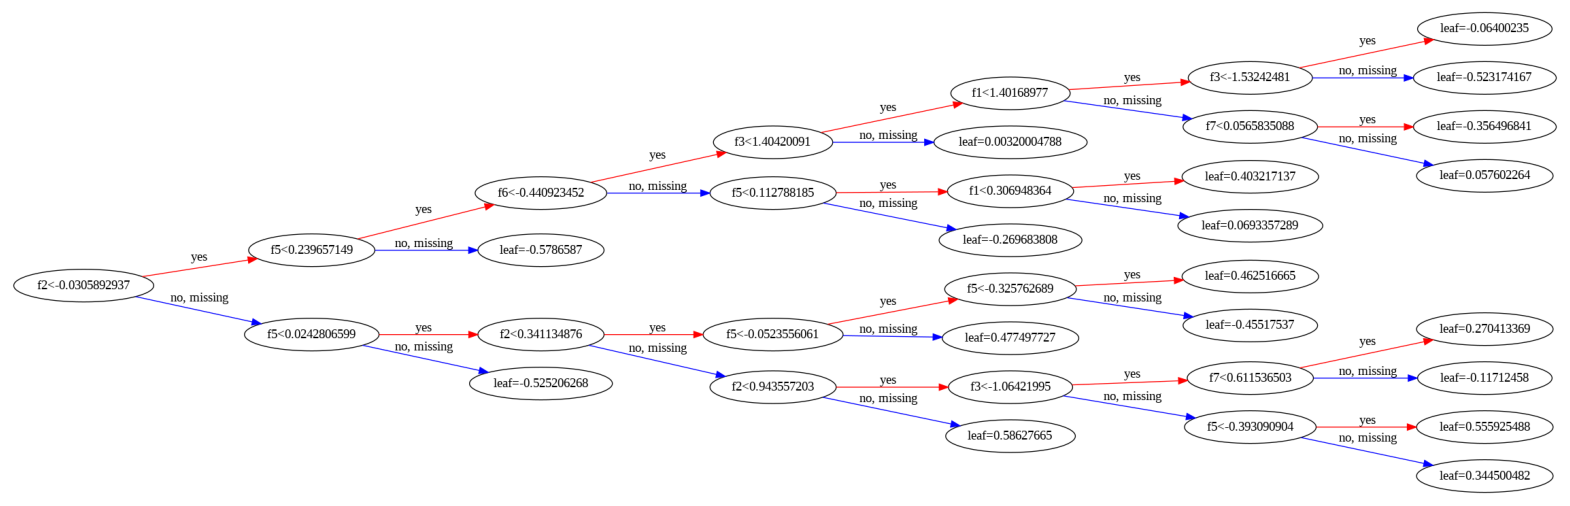

In [ ]:
#XGBOOST graph model
plt.figure(figsize=(8,6))
fig, ax = plt.subplots(figsize=(20, 15))
plot_tree(xgb, num_trees=0, rankdir='LR', ax=ax)
plt.show()

In [1]:
#import module
from sklearn.ensemble import RandomForestClassifier

In [ ]:
### Train your Random Forest model below
rf = RandomForestClassifier(max_depth=None, n_estimators=50, max_features=5, random_state=42)
rf.fit(X_train, y_train)
rf_y_pred = rf.predict(X_test)

Random Forest Accuracy Score: 0.912
Random Forest Model Score: 1.0
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.89      0.92       142
           1       0.87      0.94      0.90       108

    accuracy                           0.91       250
   macro avg       0.91      0.91      0.91       250
weighted avg       0.91      0.91      0.91       250

Random Forest Confusion Matrix:


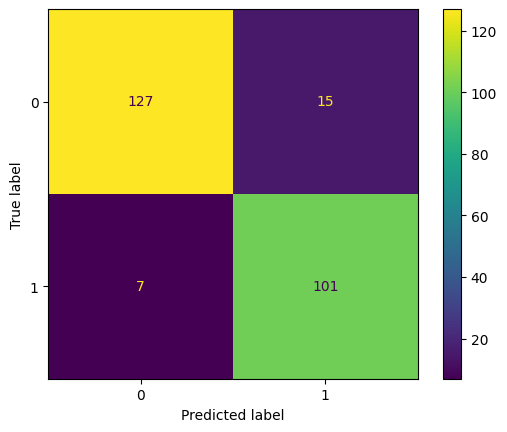

In [ ]:
# Testing accuracy of Random Forest model
print(f'Random Forest Accuracy Score: {accuracy_score(y_test,rf_y_pred)}')
print(f'Random Forest Model Score: {rf.score(X_train, y_train)}')
print(f'Random Forest Classification Report:')
print(classification_report(y_test, rf_y_pred))
print(f'Random Forest Confusion Matrix:')
cm = confusion_matrix(y_test, rf_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
### Cross validation score for Random Forest
rf_cvs = cross_val_score(rf, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {rf_cvs}")
print(f"Average CV Score: {rf_cvs.mean():.2f}")

Cross-Validation Scores: [0.94       0.96666667 0.92       0.92666667 0.98      ]
Average CV Score: 0.95


In [ ]:
# Define your Random Forest classifier
classifier = (n_estimators=100, random_state=42)  # You can set hyperparameters if needed

# Define the number of folds for stratified cross-validation
n_splits = 5

# Create an instance of StratifiedKFold
stratified_kfold = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_scores = cross_val_score(classifier, X_train, y_train, cv=stratified_kfold)

# Print the cross-validation scores
print("Cross-validation scores:", cross_val_scores)

# Train your Random Forest classifier on the entire training set
classifier.fit(X_train, y_train)

# Evaluate your Random Forest classifier on the test set
test_accuracy = classifier.score(X_test, y_test)
print("Test set accuracy:", test_accuracy)

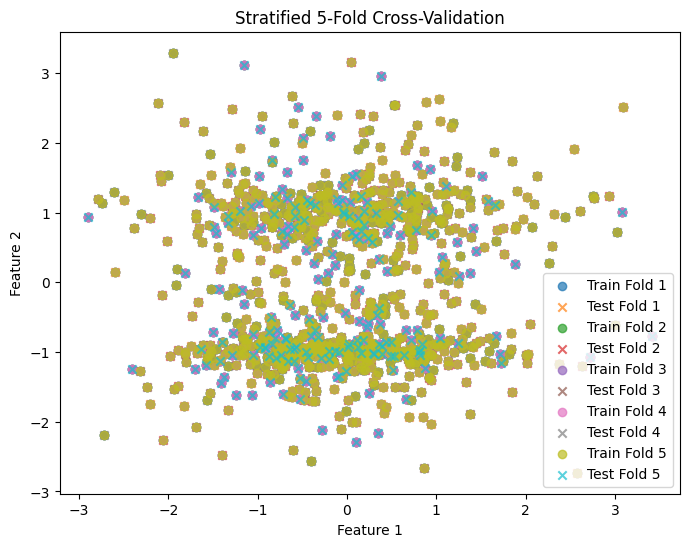

In [ ]:
#Plotting the folds
fig, ax = plt.subplots(figsize=(8, 6))
for i, (train_index, test_index) in enumerate(stratified_kfold.split(X, y)):
    # Plot training points
    ax.scatter(X[train_index, 0], X[train_index, 1], label=f'Train Fold {i + 1}', alpha=0.7)

    # Plot testing points
    ax.scatter(X[test_index, 0], X[test_index, 1], label=f'Test Fold {i + 1}', marker='x', alpha=0.7)

# Customize plot
ax.set_title(f'Stratified {n_splits}-Fold Cross-Validation')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.legend()
plt.show()

In [ ]:
#import module
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
### Train your k-NN  model below
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
knn_y_pred = knn.predict(X_test)

k-NN Accuracy Score: 0.86
k-NN Model Score: 0.92
k-NN Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.87      0.86       127
           1       0.87      0.85      0.86       123

    accuracy                           0.86       250
   macro avg       0.86      0.86      0.86       250
weighted avg       0.86      0.86      0.86       250

k-NN Confusion Matrix:


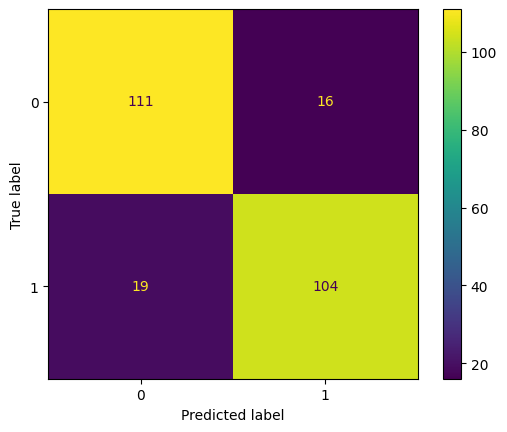

In [ ]:
# Testing accuracy, and model score of k-NN model
print(f'k-NN Accuracy Score: {accuracy_score(y_test,knn_y_pred)}')
print(f'k-NN Model Score: {knn.score(X_train, y_train)}')
print(f'k-NN Classification Report:')
print(classification_report(y_test, knn_y_pred))
#Confusin Matrix of knn model
print(f'k-NN Confusion Matrix:')
cm = confusion_matrix(y_test, knn_y_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot()

In [ ]:
### Cross validation score for knn
knn_cvs = cross_val_score(knn, X_train, y_train, cv=5)
print(f"Cross-Validation Scores: {knn_cvs}")
print(f"Average CV Score: {knn_cvs.mean():.2f}")


Cross-Validation Scores: [0.91333333 0.88666667 0.88666667 0.9        0.91333333]
Average CV Score: 0.90
